# Challenge 1

## Our Dataset: Tesla Stock Data

### Data Found At: https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TSLA.csv", index_col = "Date", 
                 parse_dates = True)

df['2014' : '2016']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  149.800003  152.479996  146.550003  150.100006  150.100006   
2014-01-03  150.000000  152.190002  148.600006  149.559998  149.559998   
2014-01-06  150.000000  150.399994  145.240005  147.000000  147.000000   
2014-01-07  147.619995  150.399994  145.250000  149.360001  149.360001   
2014-01-08  148.850006  153.699997  148.759995  151.279999  151.279999   
...                ...         ...         ...         ...         ...   
2016-12-23  208.000000  213.449997  207.710007  213.339996  213.339996   
2016-12-27  214.880005  222.250000  214.419998  219.529999  219.529999   
2016-12-28  221.529999  223.800003  217.199997  219.740005  219.740005   
2016-12-29  218.559998  219.199997  214.119995  214.679993  214.679993   
2016-12-30  216.300003  217.500000  211.679993  213.690002  213.690002   

             Volume  
Date                 
2014-01-02  6188400  
2014-01-03  4695000  
2014-01-06  5361100  
2014-01-07  5034100  
2014-01-08  6163200  
...             ...  
2016-12-23  4670500  
2016-12-27  5915700  
2016-12-28  3782500  
2016-12-29  4045000  
2016-12-30  4642600  

[756 rows x 6 columns]

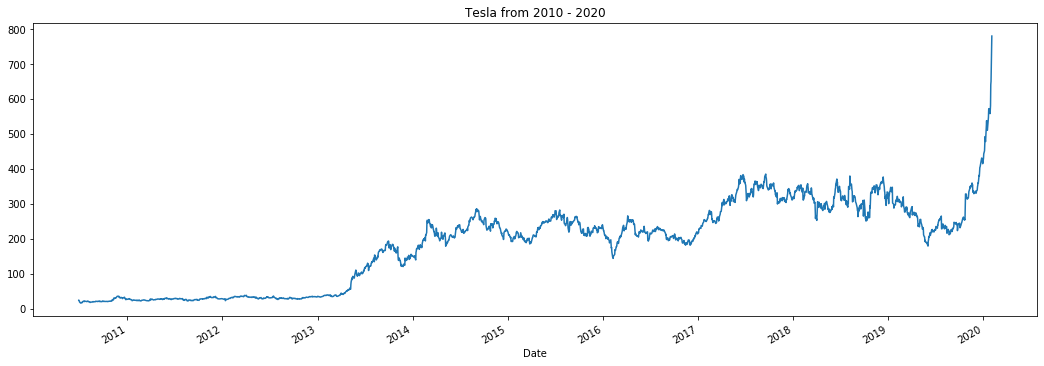

In [29]:
df.loc['2010':'2020', 'Close'].plot(figsize=(18,6), title = "Tesla from 2010 - 2020")

### Data For F found at: https://finance.yahoo.com/quote/F/history?p=F

In [30]:
df_f = pd.read_csv("F.csv", index_col = "Date", parse_dates = True)

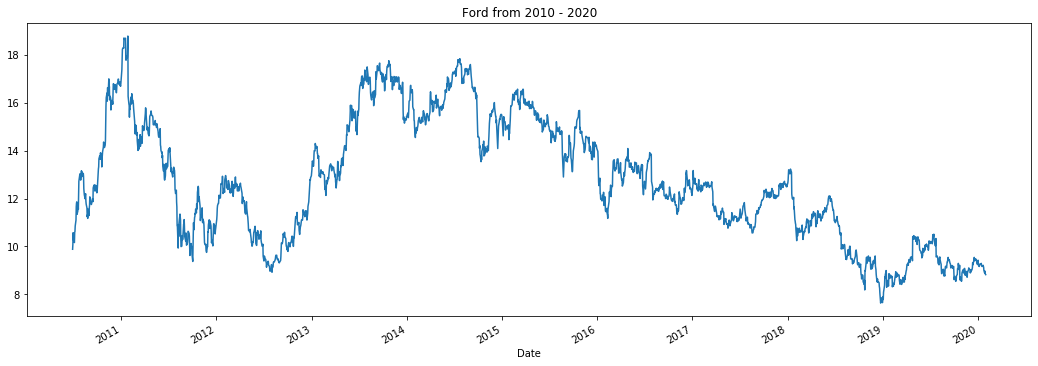

In [31]:
df_f.loc['2010':'2020', 'Close'].plot(figsize=(18,6), title = "Ford from 2010 - 2020")

## Merging Tesla and Ford with Yahoo Finance Data

In [33]:
df['pct_change'] = df.Close.pct_change().cumsum()
df_f['pct_change'] = df_f.Close.pct_change().cumsum()
df_merged = df.merge(df_f, on = "Date", suffixes = [" Tesla", " Ford"])

## Plotting both Tesla and Ford closing Prices from 2010 - 2020

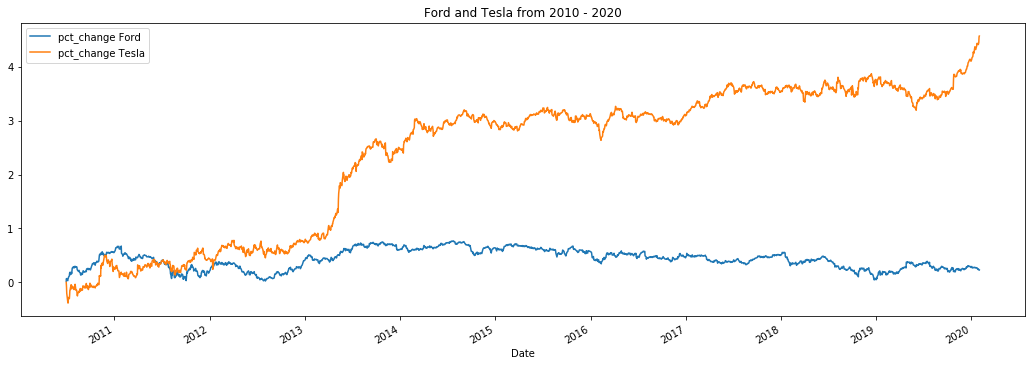

In [34]:
df_merged.loc['2010':'2020', ["pct_change Ford", "pct_change Tesla"]].plot(figsize=(18,6), title = "Ford and Tesla from 2010 - 2020")

## Adding Amazon and Apple to compare
### Data for AAPL at: https://finance.yahoo.com/quote/AAPL/history?p=AAPL
### Data for AMZN at: https://finance.yahoo.com/quote/AMZN/history?p=AMZN

In [35]:
df_amzn = pd.read_csv("AMZN.csv", index_col = "Date", parse_dates = True)
df_appl = pd.read_csv("AAPL.csv", index_col = "Date", parse_dates = True)

## Merging both Amazon and Apple

In [36]:
df_amzn['pct_change'] = df_amzn.Close.pct_change().cumsum()
df_appl['pct_change'] = df_appl.Close.pct_change().cumsum()
df_merged_tech = df_amzn.merge(df_appl, on = "Date", suffixes = [" Amazon", " Apple"])

## Plotting both Amazon and Apple closing Prices from 2010 - 2020


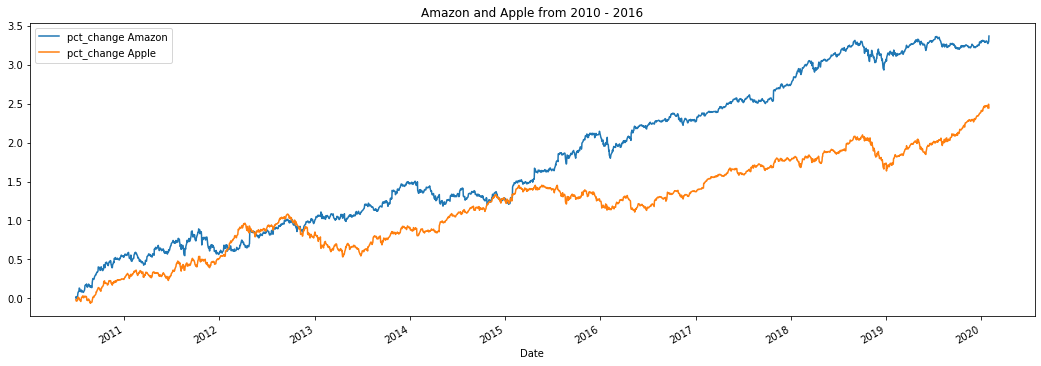

In [37]:
df_merged_tech.loc['2010':'2020', ["pct_change Amazon", "pct_change Apple"]].plot(figsize=(18,6), title = "Amazon and Apple from 2010 - 2016")

## Plotting AMZN, AAPL, TSLA, F closing prices from 2010 - 2020

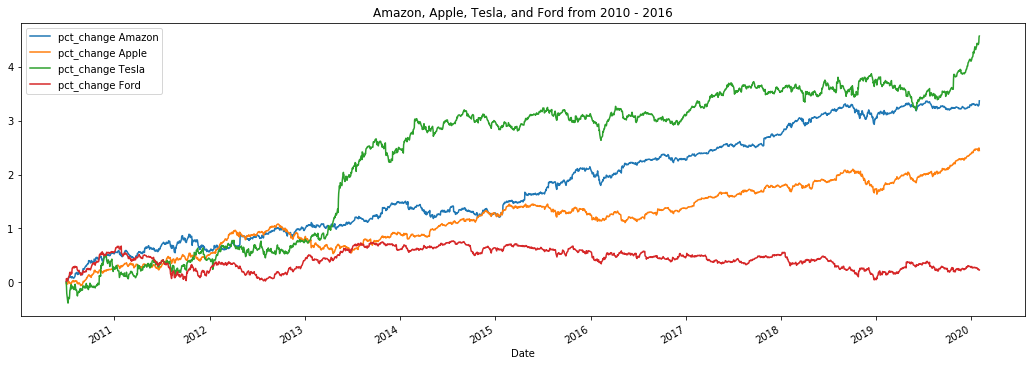

In [38]:
df_merged_sector = df_merged.merge(df_merged_tech, on = "Date")
df_merged_sector.loc['2010':'2020', ["pct_change Amazon", "pct_change Apple", "pct_change Tesla", "pct_change Ford"]].plot(figsize=(18,6), title = "Amazon, Apple, Tesla, and Ford from 2010 - 2016")